### EV DATASET of Washington

#### In this dataset, we have details on electric vehicles registered across the United States. We get to know about each vehicle's make, model, type, electric range, legislative district, and location. Tesla seems to be the most popular make among electric vehicle owners, with the Model 3 being the most common model.

#### For owners of electric vehicles, the electric range is a critical parameter, and this dataset helps in trip planning and an understanding of the limitations of their particular car. Additionally, the information reveals whether a vehicle qualifies for clean alternative fuel vehicle incentives, which is an important consideration for buyers.

#### Policymakers and urban planners can use this dataset to better understand the location and features of electric vehicles. It offers information about how popular electric vehicles are right now in the US.


#### We have deployed 7 scenarios in different visualizations using the libraries seaborn, folium and matplotlib 

#### The visualization techniques we have used are: 
#### 1.	Bar Graph
#### 2.	Line Graph
#### 3.	Heat Map
#### 4.	Pie Chart
#### 5.	Histogram Graph
#### 6.	Box Plot
#### 7.	Scatter Plot


In [ ]:
import datetime 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
try:
    import folium
    from folium import plugins
    import seaborn as sns
except ImportError:
    !conda install --yes folium
    !conda install --yes seaborn
    import folium
    from folium import plugins 
    import seaborn as sns

#### Cleaning Data
This code reads in uncleaned data from a CSV file and drops the "Base MSRP" column. It then fills missing values in the "Model" column using the "ffill" method, and fills missing values in the "County", "City", "Postal Code", and "Vehicle Location" columns using the mode. The "Electric Range" column is filled with the mean value of each vehicle model, or the overall mean if no model is specified. The "Legislative District" column is interpolated using the linear method, and any remaining missing values are filled with the mean. Finally, the "Electric Utility" column is filled using both the "ffill" and "backfill" methods, and the "2020 Census Tract" column is interpolated using the linear method before the cleaned data is saved to a new CSV file.

In [ ]:
#use ucdata for uncleaned data visualization
ucdata = pd.read_csv("EV_data.csv", on_bad_lines="skip")
print(f"data_shape = {ucdata.shape}")
ucdata.isnull().sum()

data_shape = (121978, 17)


VIN (1-10)                                                0
County                                                    2
City                                                      2
State                                                     0
Postal Code                                               2
Model Year                                                0
Make                                                      0
Model                                                   104
Electric Vehicle Type                                     0
Clean Alternative Fuel Vehicle (CAFV) Eligibility         0
Electric Range                                        47417
Base MSRP                                            118511
Legislative District                                    297
DOL Vehicle ID                                            0
Vehicle Location                                         32
Electric Utility                                        469
2020 Census Tract                       

In [ ]:
ucdata.drop(columns=['Base MSRP'],inplace=True)
ucdata.shape

(121978, 16)

In [ ]:
ucdata.isnull().sum()

VIN (1-10)                                               0
County                                                   2
City                                                     2
State                                                    0
Postal Code                                              2
Model Year                                               0
Make                                                     0
Model                                                  104
Electric Vehicle Type                                    0
Clean Alternative Fuel Vehicle (CAFV) Eligibility        0
Electric Range                                       47417
Legislative District                                   297
DOL Vehicle ID                                           0
Vehicle Location                                        32
Electric Utility                                       469
2020 Census Tract                                        2
dtype: int64

In [ ]:
cleandata=ucdata #use cleanedata for using clean data visualization

In [ ]:
cleandata['Model'].fillna(method='ffill', inplace=True)#filling the model missing values with forward fill


In [ ]:
mode = cleandata["County"].mode()[0]#Filling the County missing values with mode value
cleandata['County'].fillna(value=mode, inplace=True)

In [ ]:
mode = cleandata["City"].mode()[0]#Filling the City missing values with mode value
cleandata['City'].fillna(value=mode, inplace=True)

In [ ]:
mode= cleandata["Postal Code"].mode()[0]#Filling the Postal code missing values with mode value
cleandata['Postal Code'].fillna(value=mode, inplace=True)

In [ ]:
model_means = cleandata.groupby('Model')['Electric Range'].transform(lambda x: x.mean())

# Fill missing values in column two with the mean of each model
cleandata['Electric Range'].fillna(value=model_means, inplace=True)
means=cleandata["Electric Range"].mean()
cleandata['Electric Range'].fillna(value=means, inplace=True)

In [ ]:
backup=cleandata
cleandata['Legislative District'] = cleandata['Legislative District'].interpolate(method='linear')#filling the missing values with interpolate linear
cleandata.to_csv('cleandata.csv', index=False)
means=cleandata["Legislative District"].mean()
cleandata['Legislative District'].fillna(value=means, inplace=True)

In [ ]:
mode = cleandata["Vehicle Location"].mode()[0]#filling the missing values with mode
cleandata['Vehicle Location'].fillna(value=mode, inplace=True)

In [ ]:
cleandata['Electric Utility'].fillna(method='ffill', inplace=True)#Filling the misiing values with forward fill
cleandata['Electric Utility'].fillna(method='backfill', inplace=True)

In [ ]:
cleandata['2020 Census Tract'] = cleandata['2020 Census Tract'].interpolate(method='linear')#Filling the misiing values with interpolate linear
cleandata.to_csv('cleandata.csv', index=False)

In [ ]:
cleandata.isnull().sum()

VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
Latitude                                             0
Longitude                                            0
dtype: int

In [ ]:
originaldata = pd.read_csv("EV_data.csv", on_bad_lines="skip")

In [ ]:
originaldata.isnull().sum()

VIN (1-10)                                                0
County                                                    2
City                                                      2
State                                                     0
Postal Code                                               2
Model Year                                                0
Make                                                      0
Model                                                   104
Electric Vehicle Type                                     0
Clean Alternative Fuel Vehicle (CAFV) Eligibility         0
Electric Range                                        47417
Base MSRP                                            118511
Legislative District                                    297
DOL Vehicle ID                                            0
Vehicle Location                                         32
Electric Utility                                        469
2020 Census Tract                       

## Visualization-1: Average Range Vs Car Model

Column 1
MODEL Y              291.000000
KONA                 258.000000
BOLT EV              243.695319
MODEL X              239.332718
MODEL 3              237.931380
                        ...    
RANGE ROVER           19.000000
RANGE ROVER SPORT     19.000000
Q5 E                  18.838912
BENTAYGA              17.500000
A8 E                  17.000000
Name: Column 2, Length: 100, dtype: float64


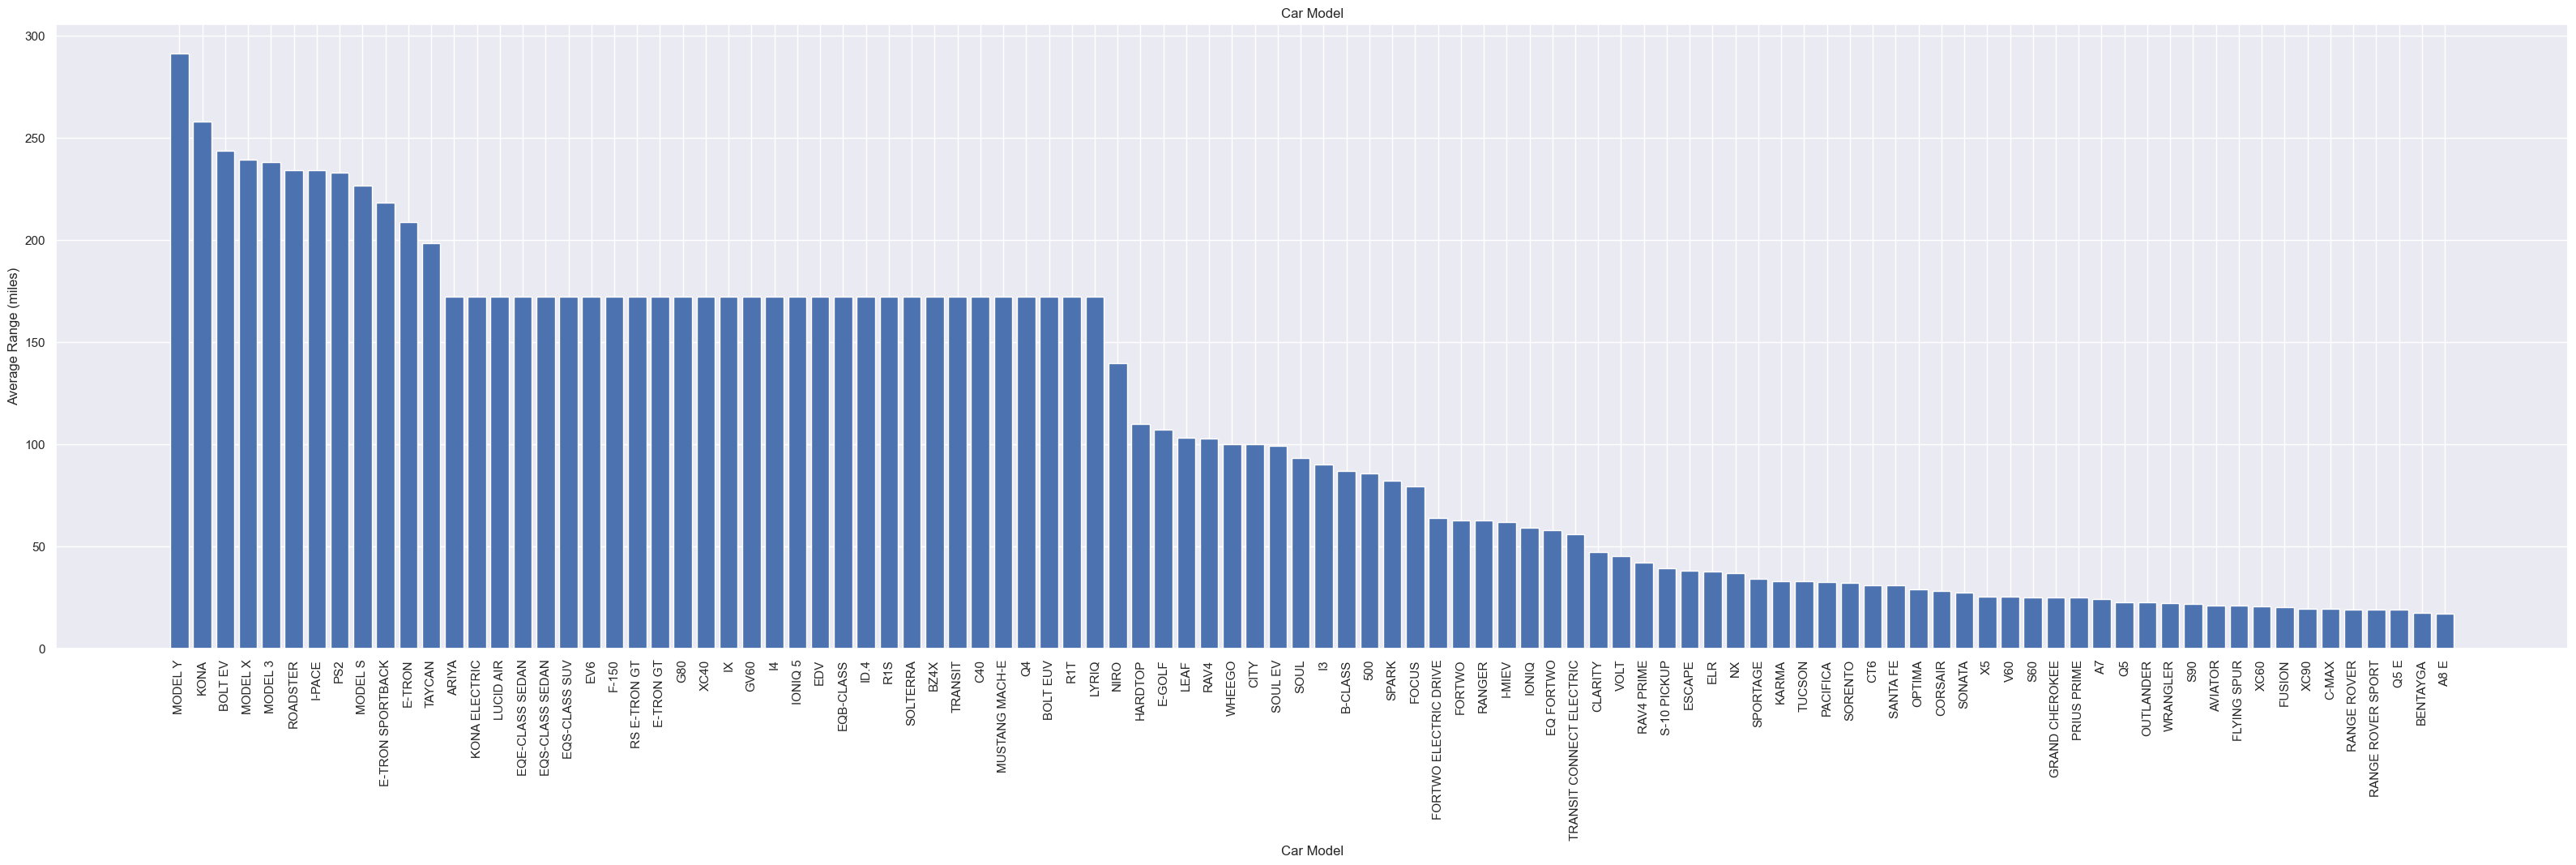

In [ ]:
table1 = pd.DataFrame({'Column 1': cleandata.iloc[:, 7], 'Column 2': cleandata.iloc[:, 10]})



avg_range = table1.groupby('Column 1')['Column 2'].mean()


# Create a bar graph of the average range for each car model
top = avg_range.sort_values(ascending=False).head(100)
print(top)

fig, ax = plt.subplots(figsize=(40,10))
ax.bar(top.index, top.values)
ax.set_xlabel('Car Model')
ax.set_ylabel('Average Range (miles)')
ax.set_title('Car Model')
ax.tick_params(axis='x', rotation=90)  # rotate x-axis labels
plt.show()


### From the Visualization we can find that: 
 
1.The graph shows that on average, BEV cars have a higher range than PHEV cars. 

2.This indicates that BEV cars may be a better choice for drivers who require longer driving ranges. 

3.The graph also shows that there are differences in the range of different car models within each electric vehicle type. 

4.Therefore, it is important for electric vehicle buyers to carefully consider the range of different car models when making a purchase decision.

## Visualization-2: Model Year Vs Count of EV Cars for the two different types of EV Cars


In [ ]:
#grouping the cleaned data as per requirement
cleandata_grouped= cleandata.groupby(['Model Year','Electric Vehicle Type']).count().reset_index()
cleandata_grouped

,Model Year,Electric Vehicle Type,VIN (1-10),County,City,State,Postal Code,Make,Model,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,1997,Battery Electric Vehicle (BEV),1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,1998,Battery Electric Vehicle (BEV),1,1,1,1,1,1,1,1,1,1,1,1,1,1
2,1999,Battery Electric Vehicle (BEV),4,4,4,4,4,4,4,4,4,4,4,4,4,4
3,2000,Battery Electric Vehicle (BEV),9,9,9,9,9,9,9,9,9,9,9,9,9,9
4,2002,Battery Electric Vehicle (BEV),2,2,2,2,2,2,2,2,2,2,2,2,2,2
5,2003,Battery Electric Vehicle (BEV),1,1,1,1,1,1,1,1,1,1,1,1,1,1
6,2008,Battery Electric Vehicle (BEV),22,22,21,22,22,22,22,22,22,22,22,22,22,22
7,2010,Battery Electric Vehicle (BEV),22,22,22,22,22,22,22,22,22,22,22,22,22,22
8,2010,Plug-in Hybrid Electric Vehicle (PHEV),3,3,3,3,3,3,3,3,3,3,3,3,3,3
9,2011,Battery Electric Vehicle (BEV),758,758,758,758,758,758,758,758,758,758,758,758,758,758


#### Plotting a line graph which shows the count of EV cars per model against market year for the two different types

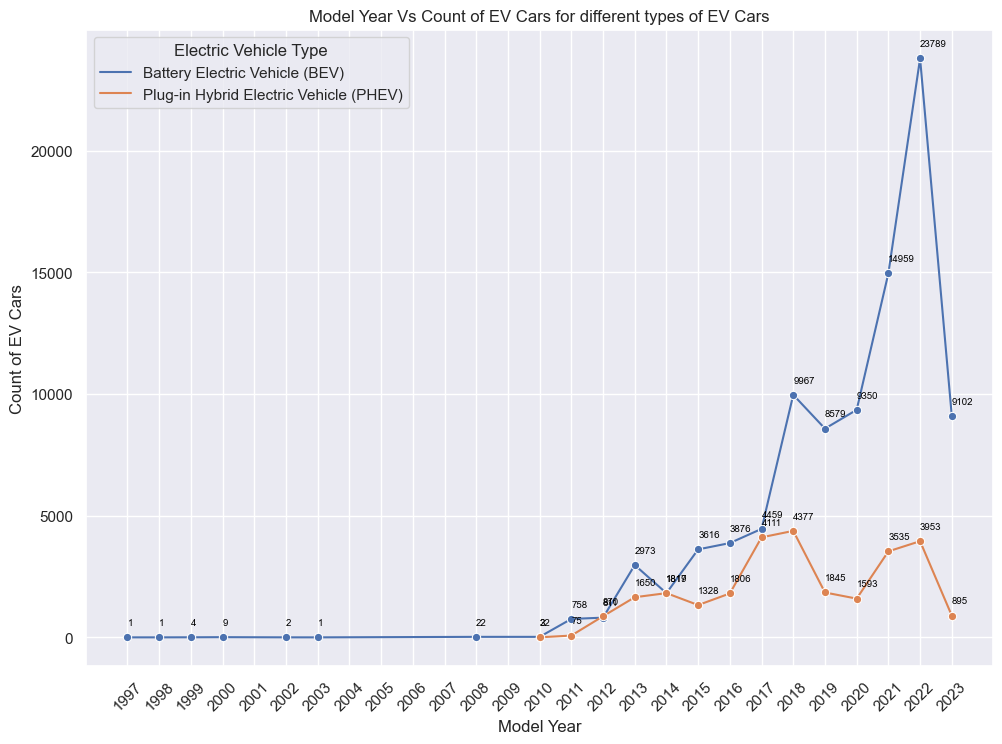

In [ ]:

sns.set(rc={'figure.figsize':(11.7,8.27)})

ax=sns.lineplot(data=cleandata_grouped, x='Model Year', y='VIN (1-10)', hue='Electric Vehicle Type', marker='o')
ax.set(ylabel='Count of EV Cars', title='Model Year Vs Count of EV Cars for different types of EV Cars')
plt.xticks(range(min(cleandata_grouped['Model Year']), max(cleandata_grouped['Model Year'])+1))
# label points on the plot
for x, y in zip(cleandata_grouped['Model Year'], cleandata_grouped['VIN (1-10)']):
    plt.text(x = x, # x-coordinate position of data label
            y = y+500, # y-coordinate position of data label, adjusted to be 500 below the data point
            s = '{:.0f}'.format(y), # data label, formatted to ignore decimals
            color = 'black', # set colour of line
            fontsize=7) # set font size 
plt.xticks(rotation=45)
plt.show()

### It can be inferred from this graph that the Battery electric vehicles have dominated the manufacturing market for majority of the years.
### They've also been in manufacturing since 1997 whereas the Hybrid vehicles have started only after 2010. 
### The BEV's count peaked in the year 2022 this could due to factors such as increased demands and the people responding to the subsidies provided by the government.
### The data for 2023 is comparitively low this is majorly because the data is available only for the month until April.

## Visualization 3 - EV Car density in the cities of WA

In [ ]:
cleandata['State'].value_counts(normalize=True)*100

WA    99.756513
CA     0.063126
VA     0.031153
MD     0.022135
TX     0.015577
CO     0.008198
NC     0.007378
AZ     0.006559
CT     0.005739
NV     0.005739
IL     0.005739
SC     0.004919
GA     0.004919
DC     0.004099
NY     0.004099
FL     0.004099
NJ     0.004099
NE     0.003279
HI     0.003279
LA     0.003279
KS     0.003279
MA     0.002459
MO     0.002459
AR     0.002459
OR     0.002459
PA     0.002459
AL     0.001640
TN     0.001640
ID     0.001640
OH     0.001640
WY     0.001640
UT     0.001640
BC     0.001640
NM     0.000820
DE     0.000820
AK     0.000820
IN     0.000820
MS     0.000820
WI     0.000820
NH     0.000820
MN     0.000820
RI     0.000820
KY     0.000820
OK     0.000820
Name: State, dtype: float64

#### Since the dataset proposes the EV population of washington, but has data from other state by a small fraction. The data needs to be cleaned for the geographical visualization.


In [ ]:
#eliminating all the rows without washinton as the state
cleandata.drop(ucdata[ucdata['State'] != 'WA'].index, inplace = True) 

#### For geographical plotting the data we need to have separate latitude and longitude, the below code separates them from the "Vehicle Location" column

In [ ]:
lat_list=[]
lon_list=[]
for i in cleandata['Vehicle Location']:    
    lat_lon=i.split('(')[1].split(')')[0].split(' ')
    lon=float(lat_lon[0])
    lat=float(lat_lon[1])
    lat_list.append(lat)
    lon_list.append(lon)

cleandata['Latitude']=lat_list
cleandata['Longitude']=lon_list

### Normalizing Data
#### The heatmap took over 10 minutes to render when all the data in the table was used, hence I have normalized the data based on the "City" to plot with higher efficiency.

In [ ]:
data_citygroup=cleandata['City'].value_counts().reset_index()
data_citygroup

,index,City
0,Seattle,21665
1,Bellevue,6375
2,Redmond,4588
3,Vancouver,4363
4,Kirkland,3882
...,...,...
442,Hartline,1
443,Bridgeport,1
444,Warden,1
445,Danville,1


In [ ]:
from sklearn import preprocessing
normalized_count = preprocessing.normalize([data_citygroup['City']])
data_citygroup['NormalizedCounts']=normalized_count.tolist()[0]
grouped = cleandata.groupby(['City']).first().reset_index()
lat = list(grouped['Latitude'])
lon = list(grouped['Longitude'])
data_citygroup.head()
data_citygroup['Latitude'] = lat
data_citygroup['Longitude'] = lon
df_citygroup = data_citygroup.rename(columns={'index': 'City', 'City': 'Count'})
df_citygroup

,City,Count,NormalizedCounts,Latitude,Longitude
0,Seattle,21665,0.835748,46.97606,-123.81619
1,Bellevue,6375,0.245922,48.71768,-122.20348
2,Redmond,4588,0.176986,48.35609,-117.83790
3,Vancouver,4363,0.168307,47.64430,-117.59311
4,Kirkland,3882,0.149752,46.20645,-119.76877
...,...,...,...,...,...
442,Hartline,1,0.000039,45.86679,-122.40908
443,Bridgeport,1,0.000039,46.58514,-120.56916
444,Warden,1,0.000039,47.61001,-122.18720
445,Danville,1,0.000039,46.94239,-122.60735


#### Plotting the heatmap for number of cars per city using the dataframe "df_citygroup"

In [ ]:
def simple_folium(df:pd.DataFrame, lat_col:str, lon_col:str, text_cols:str,weights:str, map_name:'HeatMap'):
    """
    Description
    ----------
        Returns a simple Folium HeatMap with Markers

    """
    #Preprocess
    #Drop rows that do not have lat/lon
    df = df[df[lat_col].notnull() & df[lon_col].notnull()]

    # Convert lat/lon to (n, 2) nd-array format for heatmap
    # Then send to list
    df_locs = list(df[[lat_col, lon_col]].values)
    df_weights = list(df[weights].values)

    # Add the location name to the markers
    text_cols = ["City"]
    text_feature_list = list(zip(*[df[col] for col in text_cols]))
    text_formated = []
    for text in text_feature_list:
        text = [str(feat) for feat in text]
        text_formated.append("<br>".join(text))
    marker_info = text_formated

    #Set up folium map
    fol_map = folium.Map([47.608013,-121.335167], zoom_start=7)

    # plot heatmap
    heat_map = plugins.HeatMap(df_locs, weights=df_weights, name=map_name)
    fol_map.add_child(heat_map)

    # plot markers
    markers = plugins.MarkerCluster(locations = df_locs, popups = marker_info, name="Testing Site")
    fol_map.add_child(markers)

    #Add Layer Control
    folium.LayerControl().add_to(fol_map)

    return fol_map

simple_folium(df_citygroup, "Latitude", "Longitude",["City"], "NormalizedCounts", "EV Car density in the cities of WA")

### This is a heatmap of the number of EV cars available per city throughout the washington state. It can be seen that the ownership of car is highly distributed. Metroplex cities such as 'seattle', 'Bellevue' are densily populated whereas the lesser establised cities such as 'westport' and 'sequim' are sparse. 
### A major factor for this could be the financial status as EVs are more expensive than regular cars only people with high financial stability would be able to afford them without a burden. 
### One other factor could be the Charging stations, in general the cities have multi-national organization which offer free charging points for its employees, this might not be the case in suburbs and also the cities have higher number of commercial charging stations than the suburbs


## Visualize-4 EV Cars Registered by Brands

In [ ]:
orig_data = pd.read_csv("EV_data.csv", on_bad_lines='skip')
print(f"data_shape = {orig_data.shape}")
orig_data.isnull().sum()

data_shape = (121978, 17)


VIN (1-10)                                                0
County                                                    2
City                                                      2
State                                                     0
Postal Code                                               2
Model Year                                                0
Make                                                      0
Model                                                   104
Electric Vehicle Type                                     0
Clean Alternative Fuel Vehicle (CAFV) Eligibility         0
Electric Range                                        47417
Base MSRP                                            118511
Legislative District                                    297
DOL Vehicle ID                                            0
Vehicle Location                                         32
Electric Utility                                        469
2020 Census Tract                       

#### As null values for column year & map are all 0, no need to clean data for this analysize

In [ ]:
cnts_make = {}
for i, row in orig_data.iterrows():
    mk = row['Make']
    if mk not in cnts_make:
        cnts_make[mk] = 0
    cnts_make[mk] += 1
print(cnts_make)

{'TESLA': 56116, 'AUDI': 2460, 'FORD': 6571, 'NISSAN': 12938, 'CHEVROLET': 10775, 'KIA': 4763, 'FIAT': 809, 'BMW': 5350, 'HYUNDAI': 1821, 'VOLVO': 2429, 'CHRYSLER': 1885, 'JEEP': 1677, 'TOYOTA': 4527, 'RIVIAN': 1253, 'VOLKSWAGEN': 3171, 'MERCEDES-BENZ': 616, 'SMART': 272, 'MITSUBISHI': 592, 'PORSCHE': 908, 'POLESTAR': 624, 'MINI': 699, 'HONDA': 798, 'LINCOLN': 186, 'GENESIS': 35, 'JAGUAR': 220, 'LUCID MOTORS': 106, 'TH!NK': 3, 'LEXUS': 45, 'CADILLAC': 109, 'SUBARU': 152, 'LAND ROVER': 38, 'FISKER': 17, 'AZURE DYNAMICS': 7, 'WHEEGO ELECTRIC CARS': 3, 'BENTLEY': 3}


In [ ]:
# Find top brands
cnts_make = list(cnts_make.items())
cnts_make = sorted(cnts_make, key=lambda x:-x[1])

# Only consider top n brands
print(cnts_make)
sorted_brands = tuple(v[0] for v in cnts_make)
top_brands = sorted_brands[:10]
print('Top 10 Brands = ', top_brands)

[('TESLA', 56116), ('NISSAN', 12938), ('CHEVROLET', 10775), ('FORD', 6571), ('BMW', 5350), ('KIA', 4763), ('TOYOTA', 4527), ('VOLKSWAGEN', 3171), ('AUDI', 2460), ('VOLVO', 2429), ('CHRYSLER', 1885), ('HYUNDAI', 1821), ('JEEP', 1677), ('RIVIAN', 1253), ('PORSCHE', 908), ('FIAT', 809), ('HONDA', 798), ('MINI', 699), ('POLESTAR', 624), ('MERCEDES-BENZ', 616), ('MITSUBISHI', 592), ('SMART', 272), ('JAGUAR', 220), ('LINCOLN', 186), ('SUBARU', 152), ('CADILLAC', 109), ('LUCID MOTORS', 106), ('LEXUS', 45), ('LAND ROVER', 38), ('GENESIS', 35), ('FISKER', 17), ('AZURE DYNAMICS', 7), ('TH!NK', 3), ('WHEEGO ELECTRIC CARS', 3), ('BENTLEY', 3)]
Top 10 Brands =  ('TESLA', 'NISSAN', 'CHEVROLET', 'FORD', 'BMW', 'KIA', 'TOYOTA', 'VOLKSWAGEN', 'AUDI', 'VOLVO')


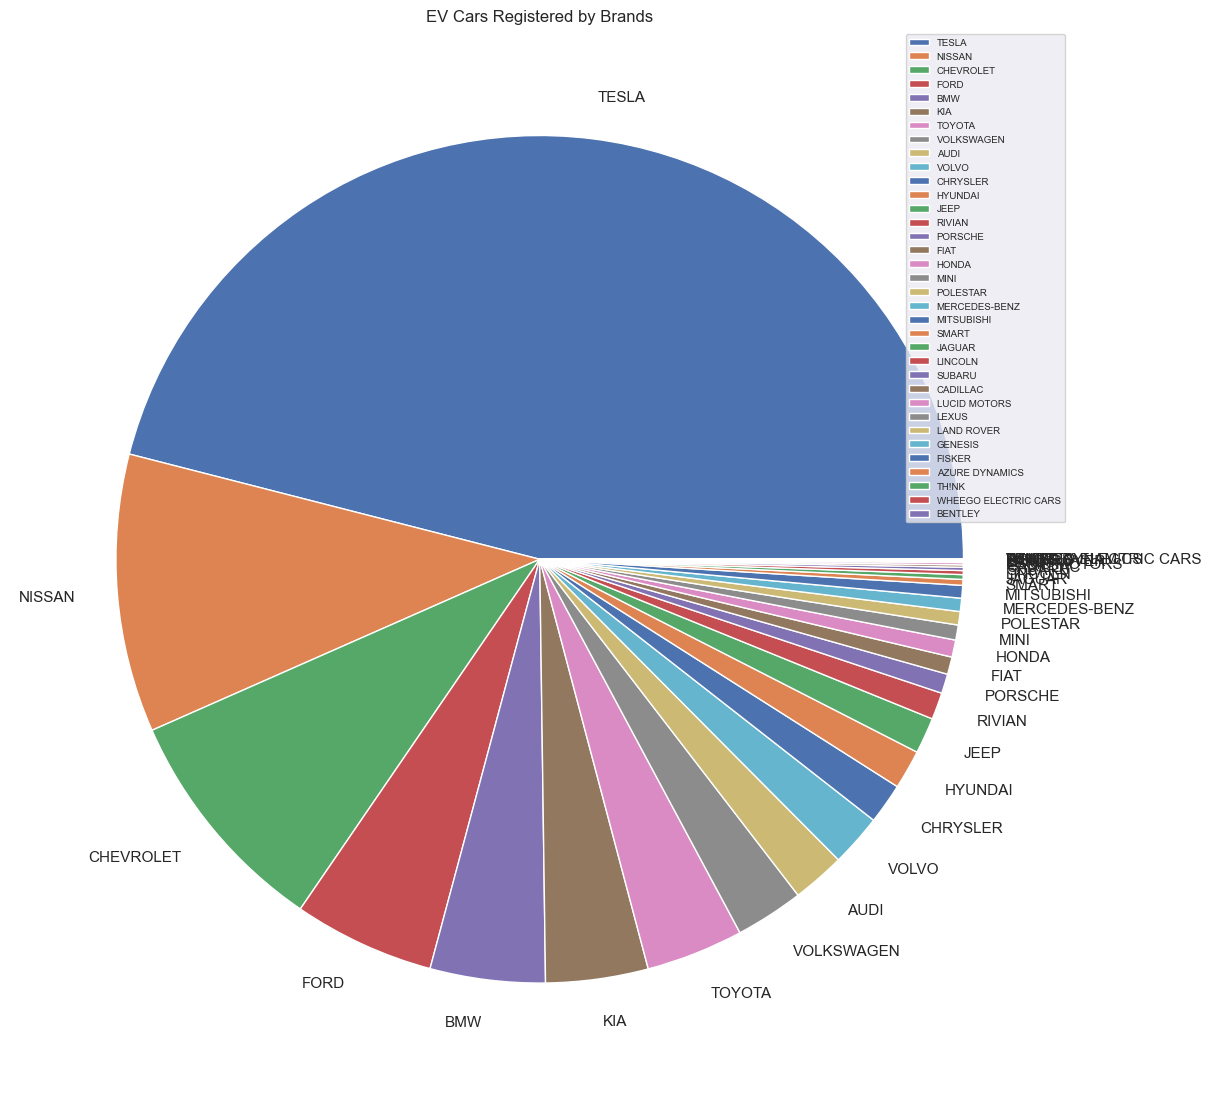

In [ ]:
import matplotlib.pyplot as plt
brands = [v[0] for v in cnts_make]
values = [v[1] for v in cnts_make]

fig, ax = plt.subplots(layout='constrained', figsize=(12,12))
ax.pie(values, labels=brands)

ax.set_title('EV Cars Registered by Brands')
ax.legend(loc='upper right',fontsize=7)
plt.show()

#### From the visualization, we can notice that the data is long tail. To make the visualization more precise, we can combine the brands registered less than 350 cars

In [ ]:
# Combine brands with <350 cars to 'OTHERS'
thres = 350
others_cnt = 0
while cnts_make[-1][1] < thres:
    others_cnt += cnts_make.pop()[1]    
cnts_make.append(('OTHERS', others_cnt))

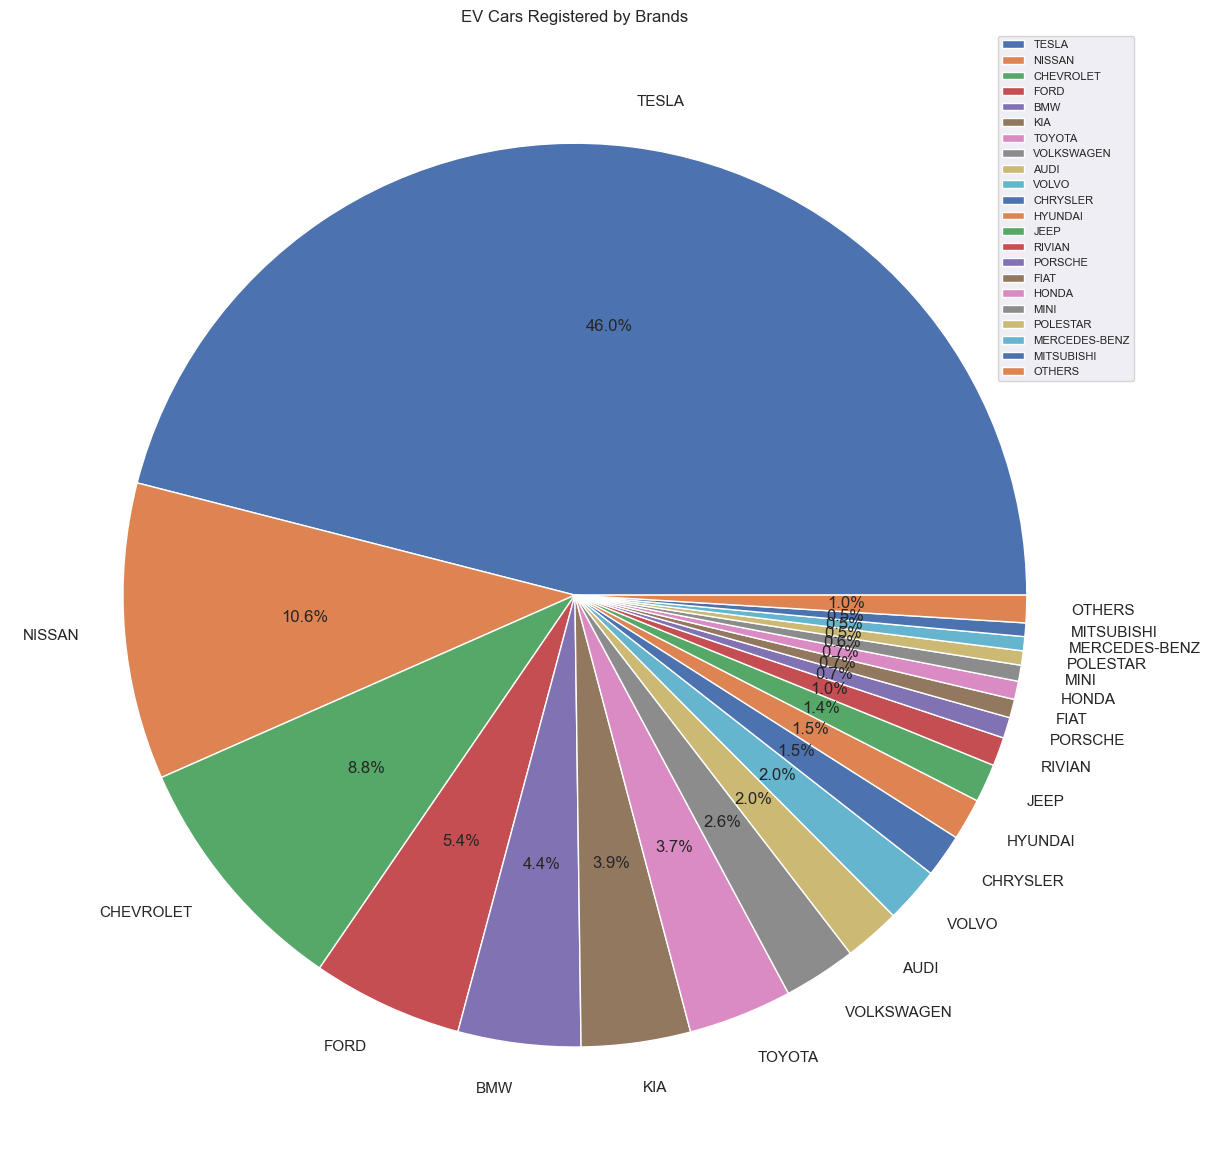

In [ ]:
brands = [v[0] for v in cnts_make]
values = [v[1] for v in cnts_make]

fig, ax = plt.subplots(layout='constrained', figsize=(12,12))
ax.pie(values, labels=brands, autopct='%1.1f%%')

ax.set_title('EV Cars Registered by Brands')
ax.legend(loc='upper right',fontsize=8)
plt.show()

### From the visualization, we can find that: 
- TESLA takes market leadership in the EV car industry, within our dataset, 46.0% registered EV cars are TESLA.
- Traditional car manufacturers are also actively taking market shares in the EV car industry. Nissan(10.6%), Chevrolet(8.8%) and Ford(5.4%) ranks second, third and fourth in the dataset.

## Visualize-5-Currently Registered EV Cars by Top Brands over Years (in dataset)

In [ ]:
import pandas as pd

In [ ]:
orig_data = pd.read_csv("EV_data.csv", on_bad_lines='skip')
print(f"data_shape = {orig_data.shape}")
orig_data.isnull().sum()
# As null values for column year & map are all 0, no need to clean data for this analysize

data_shape = (121978, 17)


VIN (1-10)                                                0
County                                                    2
City                                                      2
State                                                     0
Postal Code                                               2
Model Year                                                0
Make                                                      0
Model                                                   104
Electric Vehicle Type                                     0
Clean Alternative Fuel Vehicle (CAFV) Eligibility         0
Electric Range                                        47417
Base MSRP                                            118511
Legislative District                                    297
DOL Vehicle ID                                            0
Vehicle Location                                         32
Electric Utility                                        469
2020 Census Tract                       

In [ ]:
cnts_year_make = {}

for i, row in orig_data.iterrows():
    yr, mk = row['Model Year'], row['Make']
    if yr not in cnts_year_make:
        cnts_year_make[yr] = {}
    if mk not in cnts_year_make[yr]:
        cnts_year = cnts_year_make[yr] 
        cnts_year[mk] = 0
    cnts_year_make[yr][mk] += 1

In [ ]:
print(sorted(cnts_year_make.keys()))
for yr in sorted(cnts_year_make.keys()):
    print(yr, sum(cnts_year_make[yr].values()))

[1997, 1998, 1999, 2000, 2002, 2003, 2008, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]
1997 1
1998 1
1999 4
2000 9
2002 2
2003 1
2008 22
2010 25
2011 833
2012 1681
2013 4623
2014 3636
2015 4944
2016 5682
2017 8570
2018 14344
2019 10424
2020 10943
2021 18494
2022 27742
2023 9997


### Insights
- Limited data before 2011, ignore them
- 2023 not end yet, ignore it


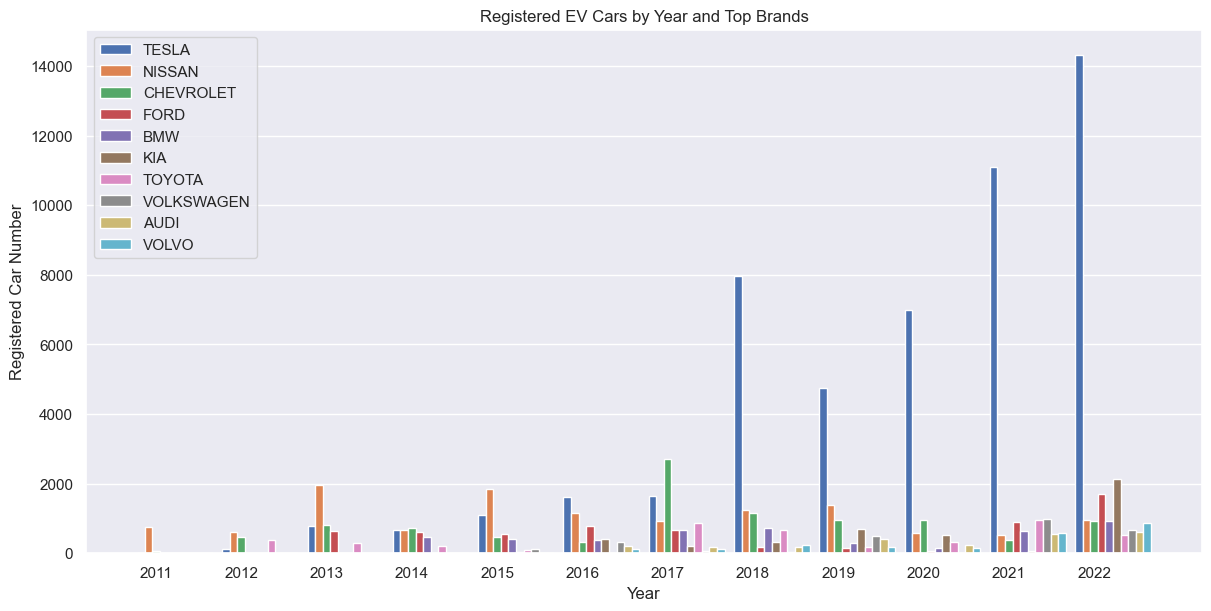

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(layout='constrained', figsize=(12,6))

vis_data = {tb:[] for tb in top_brands}

for yr in sorted(cnts_year_make.keys()):
    if yr < 2011 or yr >= 2023:
        continue
        
    for tb in top_brands:
        if tb not in cnts_year_make[yr]:
            vis_data[tb].append(0)
        else:
            vis_data[tb].append(cnts_year_make[yr][tb])


year_width = 4.5
x_locs = np.arange(len(vis_data[top_brands[0]])) * year_width
brand_width = 0.4

for i, (brand, sale_cnts) in enumerate(vis_data.items()):
    offset = brand_width * (i + 1)
    ax.bar(x_locs + offset, sale_cnts, brand_width, label=brand,tick_label='')
    

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Registered Car Number')
ax.set_xlabel('Year')
ax.set_title('Registered EV Cars by Year and Top Brands')
ax.set_xticks(x_locs + 1.2, list(range(2011,2023)))
ax.grid(axis='x')
ax.legend(loc='upper left')
plt.show()

### From the dataset visualization, we can find that: 
- Over the year 2011 -2022,The number of registered trams is growing fast.
- From 2011 to 2015, Nissan had the best performance.
- By 2016, Tesla was the number one brand in terms of volume for the first time.
- Chevrolet grew significantly in 2017，It can be presumed that this year Chevrolet launched a very attractive model, and the market response is very good.
- Then TESLA becomes a real market leader starting from the year 2018, and the trend grows over the years. Though in the year 2019, there is a sale decline (maybe caused by COVID-19).


### Visualization -6 - distribution of model years for each make of electric vehicle (in dataset)

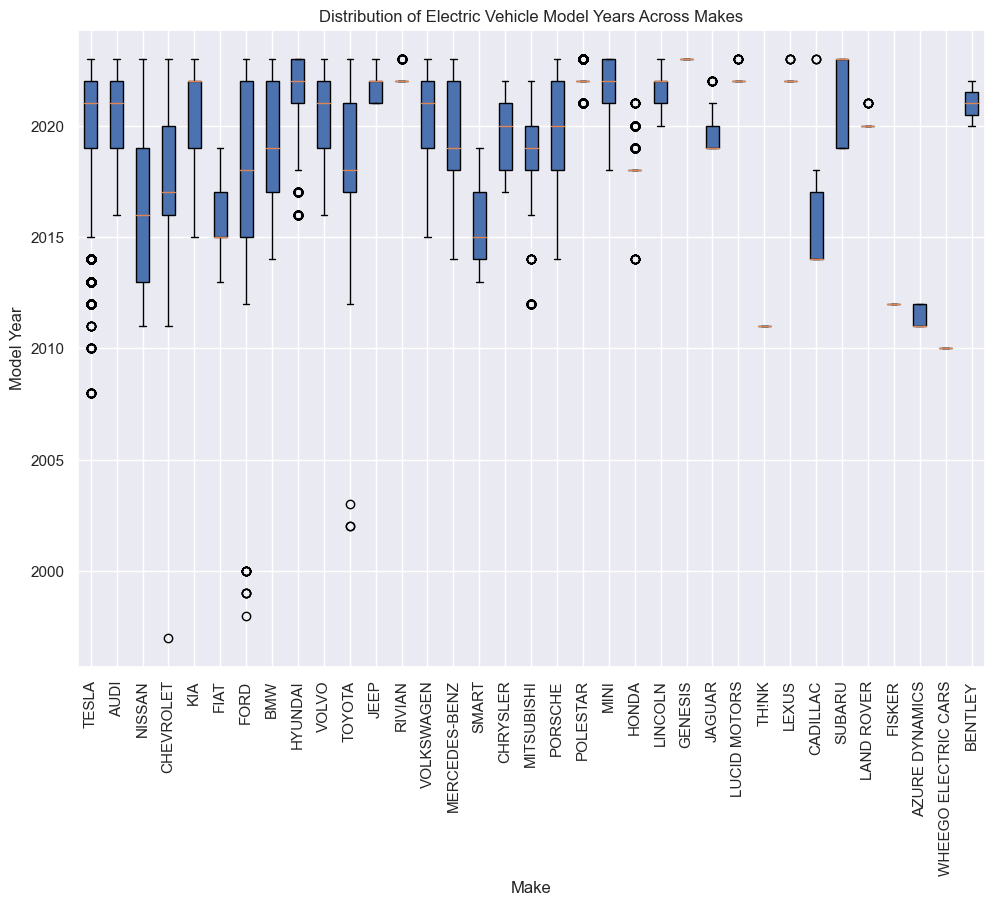

In [ ]:
boxplot_data = [cleandata[cleandata['Make'] == make]['Model Year'] for make in cleandata['Make'].unique()]
plt.boxplot(boxplot_data,patch_artist=True)
plt.xticks(range(1, len(cleandata['Make'].unique())+1), cleandata['Make'].unique(), rotation=90)
plt.xlabel('Make')
plt.ylabel('Model Year')
plt.title('Distribution of Electric Vehicle Model Years Across Makes')
plt.show()

from the boxplot above between Model year and Make, we can say that - 
- Most of the EV Cars in the dataset have been manufactured in recent years betwen 2011 to 2022.
- The box plot shows that the median model year varies across different makes, with some manufacturers having more recent model years on average than others.
- few manufacturers(Make) have a wider range of model years than others, depicting that they have been manufacturing EV Cars for a longer period of time than others.

### Visualization -7 -Electric range of the top 20 EV car models (in dataset)


C:\Users\Admin\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


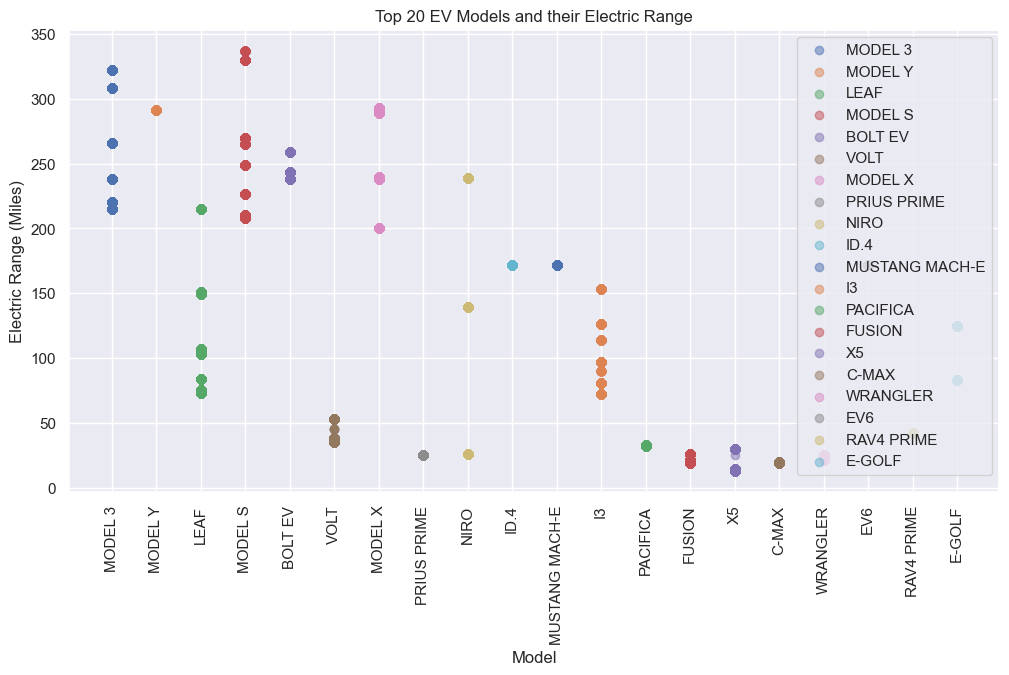

In [ ]:
top_models = cleandata['Model'].value_counts().head(20).index.tolist()

# Extract the data for the selected models
df_top_models = cleandata.loc[cleandata['Model'].isin(top_models), ['Model', 'Electric Range']]

# Create the scatter plot
fig, ax = plt.subplots(figsize=(12, 6))

for model in top_models:
    x = df_top_models.loc[df_top_models['Model'] == model, 'Electric Range']
    y = [model] * len(x)
    ax.scatter(y, x, label=model, alpha=0.5)

ax.set_title('Top 20 EV Models and their Electric Range')
ax.set_xlabel('Model')
ax.set_ylabel('Electric Range (Miles)')
ax.legend()
plt.xticks(rotation=90)
plt.show()

from the scatter plot between Model and Electric Range, we can say that - 
- The Tesla Model S and Model 3 have the longest electric range, with ranges over 300 miles.
- Most of the top 20 EV models have electric ranges between 100 and 300 miles, with some models having ranges below 100 miles.
- There is a wide range of electric ranges within the top 20 EV models, indicating that electric range is an important differentiating factor among EV models.


# Conclusion - 

Based on the visualizations, we can conclude that: 

- Tesla is the leading brand in the EV market in Washington state, followed by Chevrolet and Nissan.
- There has been a significant increase in the number of EV registrations in Washington state over the years, with the highest number of registrations in 2021.
- The average range of EVs varies significantly between car models, with Tesla models having the highest average range.
- Seattle is the city with the highest density of EVs, followed by Bellevue and Redmond.
- There are three main types of EVs in the Washington state market: Battery Electric Vehicles (BEVs), Plug-in Hybrid Electric Vehicles (PHEVs), and Fuel Cell Electric Vehicles (FCEVs).
- There has been a significant increase in the number of BEVs registered in Washington state over the years, while the number of PHEVs and FCEVs has remained relatively stable.

Overall, these visualizations suggest that the EV market in Washington state is growing rapidly, with Tesla leading the way in terms of brand popularity and average range. As more EV models enter the market and charging infrastructure continues to improve, we can expect to see even greater adoption of EVs in the state in the coming years.

# Recommendation:
## Additional columns that could help us deduce more information:
  * Charging station location: A column with the information on the places with charging station would help us understand the differece in the distribution of EV ownership.
  * Base MSRP: This column had fewer than 4000 real values. A complete column would determine if the price is a factor while people are switching to EV.
  * Estimated Battery Span: A battery life column for each model of the car can be used to establish a relationship between the highest preferred models of the car.
  * Sustainability Quotient of a car: EV's are known to emit zero CO2, however their manufacture might not be the same a sustainability coefficient would help us understand if people are considering the net zero emission as a factor during EV purchase.    